<h2><b>Scraping data about polish twitch ranking</h2></b>

### Libraries

In [1]:
from bs4 import BeautifulSoup
import time
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from selenium import webdriver
from webdriver_manager.opera import OperaDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

### Connection

In [2]:
url = "https://streamerzy.pl/ranking/"
response = requests.get(url)
response.status_code

200

### Scraping code - get all 181 pages of the ranking

In [23]:
PATH = 'C:\webdrivers\chromedriver.exe'
driver = webdriver.Chrome(executable_path=PATH)
driver.get(url)
driver.implicitly_wait(10)
cookies = driver.find_element(By.XPATH,'//a[@id="btn-cookie"]')
cookies.click()
s = []
for i in range(1,182):
    streamers = driver.find_elements(By.XPATH,'.//table[@id="ranking-table-homepage"]//tbody//tr')
    for streamer in streamers:
        ranking = streamer.find_element(By.XPATH,'.//td[@class="column-id"]').text.strip()
        name = streamer.find_element(By.XPATH,'.//a[@class="column-streamer-name"]').text.strip()
        month_ranking_change = streamer.find_element(By.XPATH,'.//div[@class="diff__value"]').text.strip()
        average_viewers = streamer.find_element(By.XPATH,'.//td[@class="message column-avg"]').text.strip()
        max_viewers = streamer.find_element(By.XPATH,'.//td[@class="column-max"]').text.strip()
        watched_hours = streamer.find_element(By.XPATH,'.//td[@class="column-watched sorted-column"]').text.strip()
        stream_time = streamer.find_element(By.XPATH,'.//td[@class="column-time"]').text.strip()
        followers_count = streamer.find_element(By.XPATH,'.//td[@class="column-followers"]').text.strip()
        last_game = streamer.find_element(By.XPATH,'.//td[@class="column-game"]').text.strip()
        s.append({'ranking':ranking,
                  'name':name,
                  'month_ranking_change':month_ranking_change,
                  'average_viewers':average_viewers,
                  'max_viewers':max_viewers,
                  'watched_hours':watched_hours,
                  'stream_time':stream_time,
                  'followers_count':followers_count,
                  'last_game':last_game})
    next_page = driver.find_element(By.XPATH,'//li[@class="active"]/following-sibling::li//a')
    driver.implicitly_wait(5)
    if i != 181:
        next_page.click()
    print(f'Getting page {i}. Waiting...')
    time.sleep(2)

C:\Users\piotr\AppData\Local\Temp\ipykernel_9584\3488423088.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=PATH)


Getting page 1. Waiting...
Getting page 2. Waiting...
Getting page 3. Waiting...
Getting page 4. Waiting...
Getting page 5. Waiting...
Getting page 6. Waiting...
Getting page 7. Waiting...
Getting page 8. Waiting...
Getting page 9. Waiting...
Getting page 10. Waiting...
Getting page 11. Waiting...
Getting page 12. Waiting...
Getting page 13. Waiting...
Getting page 14. Waiting...
Getting page 15. Waiting...
Getting page 16. Waiting...
Getting page 17. Waiting...
Getting page 18. Waiting...
Getting page 19. Waiting...
Getting page 20. Waiting...
Getting page 21. Waiting...
Getting page 22. Waiting...
Getting page 23. Waiting...
Getting page 24. Waiting...
Getting page 25. Waiting...
Getting page 26. Waiting...
Getting page 27. Waiting...
Getting page 28. Waiting...
Getting page 29. Waiting...
Getting page 30. Waiting...
Getting page 31. Waiting...
Getting page 32. Waiting...
Getting page 33. Waiting...
Getting page 34. Waiting...
Getting page 35. Waiting...
Getting page 36. Waiting...
G

In [25]:
df = pd.DataFrame(s)

In [27]:
df.shape

(1810, 9)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ranking               1810 non-null   object
 1   name                  1810 non-null   object
 2   month_ranking_change  1810 non-null   object
 3   average_viewers       1810 non-null   object
 4   max_viewers           1810 non-null   object
 5   watched_hours         1810 non-null   object
 6   stream_time           1810 non-null   object
 7   followers_count       1810 non-null   object
 8   last_game             1810 non-null   object
dtypes: object(9)
memory usage: 127.4+ KB


In [31]:
df

,ranking,name,month_ranking_change,average_viewers,max_viewers,watched_hours,stream_time,followers_count,last_game
0,1,XAYOO_,8,14 507,29 577,1 015 467,,955 851,Counter-Strike: Global Offensive
1,2,EWROON,1,9028,19 812,809 483,,878 181,Minecraft: Legends
2,3,IZAKOOO,11,5758,66 558,666 026,,1 853 673,Just Chatting
3,4,XNTENTACION,18,7957,23 739,519 842,,301 056,Chess
4,5,H2P_GUCIO,1,4277,8254,506 129,,324 269,Path of Exile
...,...,...,...,...,...,...,...,...,...
1805,1806,POLSKIHITMAN,N,21,21,4,,1368,Broken Ranks
1806,1807,ELOTHTEAM,N,21,21,4,,609,Tibia
1807,1808,TECHNOTAMPON_TV,82,23,23,4,,263,Serious Sam HD: The First Encounter
1808,1809,R6GODJAPKA,N,24,24,4,,488,Just Chatting


In [33]:
df.dtypes

ranking                 object
name                    object
month_ranking_change    object
average_viewers         object
max_viewers             object
watched_hours           object
stream_time             object
followers_count         object
last_game               object
dtype: object

In [40]:
num_cols = ['ranking','average_viewers','max_viewers','watched_hours','followers_count']

In [42]:
df[num_cols] = df[num_cols].apply(lambda x: x.str.replace(' ','')).apply(pd.to_numeric)

In [44]:
df.dtypes

ranking                  int64
name                    object
month_ranking_change    object
average_viewers          int64
max_viewers              int64
watched_hours            int64
stream_time             object
followers_count          int64
last_game               object
dtype: object

<AxesSubplot: xlabel='average_viewers', ylabel='name'>

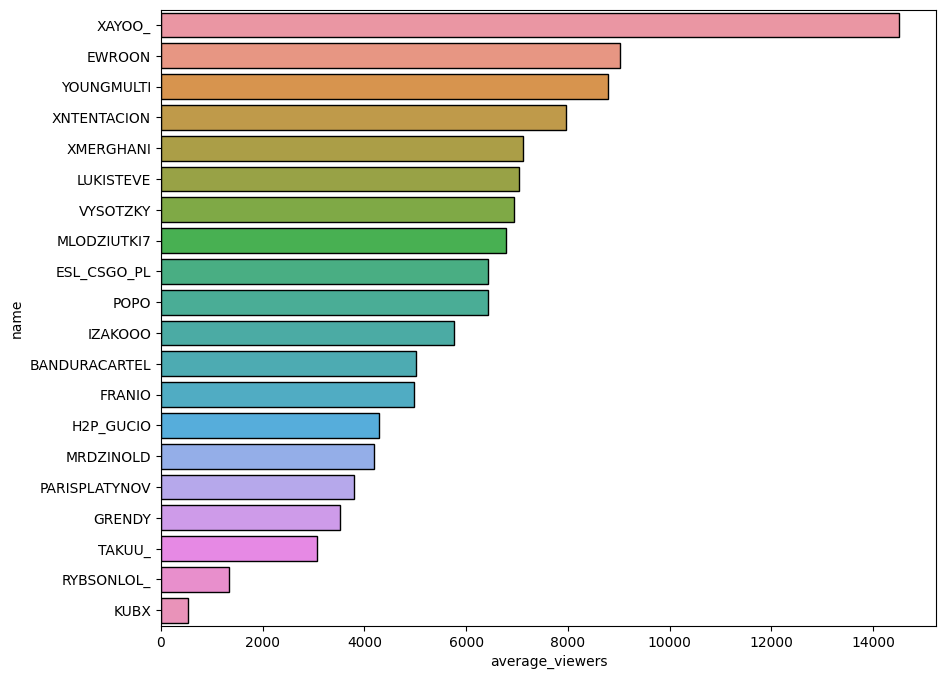

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(data=df.head(20).sort_values('average_viewers',ascending=False),
            y='name',
            x='average_viewers',
            edgecolor = 'black')